
# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#refrences">List of References</a></li>   
</ul>

<a id='intro'></a>
## Introduction

> The data set to be analyzed is TMDB Movie Data. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings, popularity of the movies, budget for the production and some details about the cast of the movie, the director, runtime and the production company. The revenue an budget are given twe times, one of them is the values in terms of 2010 dollars, accounting for inflation over time.

> Questions that will be answered through the analysis process
- The most popular movie genre all over the years
- The most popular movie genre per year
- Changes in average votes and average popularity through the years
- Changes in average revenue through the years and display the inflation effect
- Changes in average profit through the years and display the inflation effect
- Effect of budget production on the revenue
- Effect of Popularity and Votes on Revenue
- Relation between revenue and profit
- Count of movies against runtime
- The most popular movie over the years
- The movie got the highest revenue over the years


In [129]:
# Import the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Data Wrangling is about gathering, assesing and cleaning the given dataset

### General Properties

## Gather

> Upload the file then read it using pandas and read_csv

In [130]:
# Load your the Data
df = pd.read_csv("tmdb-movies.csv", index_col=0)

In [131]:
df.head()

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Assess

> In this step date will be assessed visually and programmatically
- The visual assessment will be done by spreadsheets using Excel
- The programmatic assessment will be done methods and functions of pandas such as .info(), .describe(), .value_counts(), .sample(), .shape, .head()
- Quality issues will be recorded at the end of this section to be cleaned later

In [132]:
df.shape

(10866, 20)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj       

In [134]:
sum(df.duplicated())

1

In [135]:
df.loc[df.duplicated()]

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [136]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [137]:
df.genres.value_counts()

Comedy                                             712
Drama                                              712
Documentary                                        312
Drama|Romance                                      289
Comedy|Drama                                       280
Comedy|Romance                                     268
Horror|Thriller                                    259
Horror                                             253
Comedy|Drama|Romance                               222
Drama|Thriller                                     138
Comedy|Family                                      102
Action|Thriller                                    101
Thriller                                            93
Drama|Comedy                                        92
Animation|Family                                    90
Crime|Drama|Thriller                                81
Crime|Drama                                         74
Comedy|Horror                                       72
Drama|Come

In [138]:
df.genres.unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [139]:
df.production_companies.value_counts()

Paramount Pictures                                                                                            156
Universal Pictures                                                                                            133
Warner Bros.                                                                                                   84
Walt Disney Pictures                                                                                           76
Columbia Pictures                                                                                              72
Metro-Goldwyn-Mayer (MGM)                                                                                      72
New Line Cinema                                                                                                61
Touchstone Pictures                                                                                            51
20th Century Fox                                                                        

In [140]:
df.isnull().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [141]:
df.loc[df.production_companies.isnull()]

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
300792,tt1618448,0.584363,0,0,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,http://www.racingextinction.com,Louie Psihoyos,It's better to light one candle than curse the...,animal species|earth|scientist|globe|activist,An unlikely team of activists and innovators h...,90,Adventure|Documentary,NaN,1/24/15,36,7.8,2015,0.000000e+00,0.000000e+00
360603,tt5133572,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,NaN,Alex Zamm,NaN,NaN,After getting fired from her job as a maid at ...,84,TV Movie,NaN,11/27/15,10,7.6,2015,0.000000e+00,0.000000e+00
363483,tt5133810,0.417191,0,0,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,NaN,Peter Sullivan,NaN,christmas,"When Anna Parisi, an unemployed fine arts pain...",84,Family|TV Movie,NaN,11/26/15,12,6.3,2015,0.000000e+00,0.000000e+00
354220,tt3826866,0.370258,0,0,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,NaN,Nick Simon,NaN,serial killer|tied feet|tied up while barefoot,Images coming from the crimes committed by a d...,95,Crime|Horror|Thriller,NaN,9/14/15,10,4.7,2015,0.000000e+00,0.000000e+00
308457,tt3090670,0.367617,0,0,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,NaN,Jennifer Phang,NaN,identity|unemployment|dystopic future|woman di...,In a near-future city where soaring opulence o...,92,Science Fiction|Drama|Family,NaN,6/23/15,29,6.4,2015,0.000000e+00,0.000000e+00
318279,tt2545428,0.314199,0,2334228,Meru,Conrad Anker|Grace Chin|Jimmy Chin|Amee Hinkley,http://www.merufilm.com/,Jimmy Chin|Elizabeth Chai Vasarhelyi,NaN,himalaya|climbing|india|mountaineering|woman d...,Meru is the electrifying story of three elite ...,89,Adventure|Documentary,NaN,1/25/15,42,6.9,2015,0.000000e+00,2.147489e+06
206197,tt1015471,0.302474,0,0,The Sisterhood of Night,Kara Hayward|Georgie Henley|Olivia DeJonge|Lau...,http://www.thesisterhoodofnight-movie.com/,Caryn Waechter,The Salem Witch Trials remixed.,witch|woman director,When a teenage girl says she's the victim of a...,104,Mystery|Drama|Thriller,NaN,4/10/15,25,6.6,2015,0.000000e+00,0.000000e+00
306197,tt4145304,0.295946,0,0,Unexpected,Cobie Smulders|Gail Bean|Anders Holm|Elizabeth...,NaN,Kris Swanberg,No one is ever really prepared.,woman director,An inner-city high school teacher discovers sh...,90,Drama|Comedy,NaN,7/24/15,22,5.7,2015,0.000000e+00,0.000000e+00
323967,tt2016335,0.289526,700000,0,Walter,Andrew J. West|Justin Kirk|Virginia Madsen|Wil...,NaN,Anna Mastro,Heaven or hell. It's in his hands.,god|woman director,A ticket-taker at the local cinema believes he...,87,Drama|Comedy,NaN,3/13/15,12,5.2,2015,6.439997e+05,0.000000e+00


In [142]:
df.loc[df.genres.isnull()]

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,NaN,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,NaN,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,NaN,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",NaN,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,duringcreditsstinger,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,NaN,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,NaN,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,NaN,YÄ±lmaz ErdoÄŸan,NaN,NaN,The story takes place in a small town (called ...,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,NaN,Kim Jin-Yeong,NaN,NaN,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0


In [143]:
df.loc[df.cast.isnull()]

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
345637,tt4661600,0.422901,0,0,Sanjay's Super Team,NaN,NaN,Sanjay Patel,NaN,NaN,Sanjay's Super Team follows the daydream of a ...,7,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015,0.000000e+00,0.000000e+00
355020,tt4908644,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,http://www.netflix.com/title/80031666,Evgeny Afineevsky,The Next Generation Of Revolution,NaN,A documentary on the unrest in Ukraine during ...,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,2015,0.000000e+00,0.000000e+00
321109,tt4393514,0.201696,0,0,Bitter Lake,NaN,NaN,Adam Curtis,NaN,manipulation|politics|war|control|fear,An experimental documentary that explores Saud...,135,Documentary,BBC,1/24/15,19,7.8,2015,0.000000e+00,0.000000e+00
333350,tt3762974,0.122543,0,0,A Faster Horse,NaN,NaN,David Gelb,NaN,mustang|car|corporation|henry ford family|car ...,David Gelb (Jiro Dreams of Sushi) tackles anot...,90,Documentary,NaN,10/8/15,12,8.0,2015,0.000000e+00,0.000000e+00
224972,tt3983674,0.114264,0,0,The Mask You Live In,NaN,http://themaskyoulivein.org,Jennifer Siebel Newsom,"Is american masculinity harming our boys, men ...",feminism|sexism|young boy|gender roles|misogyny,"Compared to girls, research shows that boys in...",88,Documentary,NaN,1/1/15,11,8.9,2015,0.000000e+00,0.000000e+00
319091,tt4185572,0.062536,0,0,The Hunting Ground,NaN,NaN,Kirby Dick,NaN,NaN,From the makers of The Invisible War comes a s...,103,Documentary,NaN,2/27/15,39,7.8,2015,0.000000e+00,0.000000e+00
332479,tt4550996,0.047256,0,0,Star Wars: TIE Fighter,NaN,https://www.youtube.com/watch?v=PN_CP4SuoTU,Paul Johnson,"star wars, Tie Fighter, anime",space battle|animation|space opera|military,Paul â€œOtaKingâ€ Johnson drops a real treat i...,7,Science Fiction|Action|Animation,NaN,3/24/15,29,7.6,2015,0.000000e+00,0.000000e+00
361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,NaN,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.000000e+00,0.000000e+00
169607,tt2714900,0.226028,0,1503616,Finding Vivian Maier,NaN,http://www.vivianmaier.com/film-finding-vivian...,John Maloof|Charlie Siskel,NaN,NaN,Vivian Maier's photos were seemingly destined ...,83,Documentary,NaN,3/28/14,70,7.8,2014,0.000000e+00,1.384967e+06


In [144]:
df.loc[df.director.isnull()]

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
320996,tt4073952,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,http://www.iliza.com/freezing-hot.html,NaN,NaN,stand-up|stand up comedy|aftercreditsstinger|d...,Smart and brazen comedian Iliza Shlesinger sha...,71,Comedy,New Wave Entertainment,1/23/15,14,6.6,2015,0.000000e+00,0.000000e+00
355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,sexuality|superhuman|superpower|making of|soci...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000e+00,0.000000e+00
321160,tt3908634,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,http://www.mylifetime.com/movies/with-this-ring,NaN,NaN,wedding,After attending their friend Elise's (Sudano) ...,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,1/24/15,14,6.5,2015,0.000000e+00,0.000000e+00
259910,tt3591568,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,NaN,-,superhero|marvel cinematic universe,A look at the story behind Marvel Studios and ...,43,TV Movie|Documentary,Marvel Studios|ABC Studios,3/18/14,32,6.3,2014,0.000000e+00,0.000000e+00
253675,tt3711030,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,NaN,NaN,NaN,Explore how writers Steven Moffat and Mark Gat...,60,TV Movie|Documentary,NaN,1/19/14,11,7.2,2014,0.000000e+00,0.000000e+00
256561,tt3203290,0.119891,150000,0,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,http://www.freetoplaythemovie.com,NaN,One game will change their lives.,competition|video game|esports|dota 2,Follow three professional video game players a...,75,Documentary,Valve,3/19/14,40,7.0,2014,1.381637e+05,0.000000e+00
296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,NaN,dance|dance-off,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.000000e+00
301235,tt4217172,0.038364,0,0,Top Gear: The Perfect Road Trip 2,Jeremy Clarkson|Richard Hammond,NaN,NaN,NaN,NaN,In 2013 Jeremy Clarkson and Richard Hammond em...,94,Documentary,2 Entertain Video,11/17/14,12,6.8,2014,0.000000e+00,0.000000e+00
133365,tt1127205,0.256703,0,0,The Diary of Anne Frank,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,NaN,NaN,NaN,diary|anne frank|jewish|girl|nazi occupation,Called the most accurate adaptation of Anne Fr...,100,Drama,Darlow Smithson Productions|British Broadcasti...,1/9/09,19,7.5,2009,0.000000e+00,0.000000e+00


In [145]:
df.sample(5)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
1374,tt0089927,1.149954,31000000,300473716,Rocky IV,Sylvester Stallone|Talia Shire|Burt Young|Carl...,NaN,Sylvester Stallone,He's facing the ultimate challenge. And fighti...,usa|transporter|loss of lover|cold war|union o...,Rocky must come out of retirement to battle a ...,91,Drama,United Artists,11/21/85,517,6.6,1985,6.284215e+07,6.091101e+08
920,tt0317219,3.941265,120000000,461983149,Cars,Owen Wilson|Paul Newman|Bonnie Hunt|Larry the ...,http://disney.go.com/disneyvideos/animatedfilm...,John Lasseter|Joe Ranft,Ahhh... it's got that new movie smell.,car race|car journey|village and town|road|auto,"Lightning McQueen, a hotshot rookie race car d...",117,Animation|Adventure|Comedy|Family,Walt Disney Pictures|Pixar Animation Studios,6/8/06,2336,6.4,2006,1.298003e+08,4.997129e+08
9410,tt0119223,0.607687,25000000,55494066,Great Expectations,Gwyneth Paltrow|Ethan Hawke|Chris Cooper|Anne ...,NaN,Alfonso CuarÃ³n,Let desire be your destiny.,artist|artists' life|childhood memory,Loosely based on the Charles Dickens' classic ...,111,Comedy|Drama|Romance,Twentieth Century Fox Film Corporation|Art Lin...,1/19/98,74,6.5,1998,3.344239e+07,7.423416e+07
79777,tt1714209,0.431320,10000000,303877,In the Land of Blood and Honey,Zana MarjanoviÄ‡|Goran KostiÄ‡|Branko ÄuriÄ‡|D...,http://www.inthelandofbloodandhoney.com/,Angelina Jolie,Love can change what we wantâ€¦ war can change...,muslim|sister sister relationship|sarajevo|bos...,"During the Bosnian War, Danijel, a soldier fig...",127,Drama|Romance|War,FilmDistrict,12/23/11,31,6.6,2011,9.693980e+06,2.945778e+05
91745,tt1645131,0.661618,0,1162635,Romeo & Juliet,Douglas Booth|Hailee Steinfeld|Christian Cooke...,NaN,Carlo Carlei,The most dangerous love story ever told.,shakespeare adaptation|teenager|middle ages|fa...,"In Verona, bad blood between the Montague and ...",118,Drama|Romance,Echo Lake Productions (I)|amber entertainment,9/12/13,108,6.5,2013,0.000000e+00,1.088265e+06


#### Quality issues
- Columns (imdb_id, homepage, tagline, keywords, overview, vote_count) 
- Zero values 
- Missing values
- There are one duplicate
- Release_date is string
- Profit column has to be added


### Data Cleaning 
> Cleaning will be done on the quality issues found using the cleaning strategy (definning, coding and testing)
> Cleaning steps
- Drop the unwanted columns
- replace zero values with NaN value to be dropped
- Drop the missing values
- Drop duplicates
- Change the release_date data type to datetime
- Add a profit column that will be useful in the analysis

## Clean

In [146]:
# Make a Copy
df_clean = df.copy()

In [147]:
df_clean.head(1)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


#### Define
- Drop Columns (imdb_id, homepage, tagline, keywords, overview, vote_count) by using drop function

#### Code

In [148]:
df_clean = df_clean.drop(["imdb_id", "homepage", "tagline", "keywords", "overview", "vote_count"], axis = 1)

#### Test

In [149]:
df_clean.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,1.379999e+08,1.392446e+09


#### Define
- Replace Zero values with NaN by using replace function

#### Code

In [150]:
df_clean = df_clean.replace(0, np.nan)

#### Test

In [151]:
df_clean.loc[df_clean.budget == 0]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,


In [152]:
df_clean.budget

id
135397    150000000.0
76341     150000000.0
262500    110000000.0
140607    200000000.0
168259    190000000.0
281957    135000000.0
87101     155000000.0
286217    108000000.0
211672     74000000.0
150540    175000000.0
206647    245000000.0
76757     176000003.0
264660     15000000.0
257344     88000000.0
99861     280000000.0
273248     44000000.0
260346     48000000.0
102899    130000000.0
150689     95000000.0
131634    160000000.0
158852    190000000.0
307081     30000000.0
254128    110000000.0
216015     40000000.0
318846     28000000.0
177677    150000000.0
214756     68000000.0
207703     81000000.0
314365     20000000.0
294254     61000000.0
             ...     
38720             NaN
19728             NaN
22383             NaN
13353             NaN
34388             NaN
42701         75000.0
36540             NaN
29710             NaN
23728             NaN
5065              NaN
17102             NaN
28763             NaN
2161        5115000.0
28270             NaN
26268  

Reference for how to raplace values with NaN 
- https://datatofish.com/replace-nan-values-with-zeros/

#### Define
- Drop missing values using dropna method

#### Code

In [153]:
df_clean = df_clean.dropna()

#### Test

In [154]:
df_clean.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [155]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 135397 to 2161
Data columns (total 14 columns):
popularity              3806 non-null float64
budget                  3806 non-null float64
revenue                 3806 non-null float64
original_title          3806 non-null object
cast                    3806 non-null object
director                3806 non-null object
runtime                 3806 non-null float64
genres                  3806 non-null object
production_companies    3806 non-null object
release_date            3806 non-null object
vote_average            3806 non-null float64
release_year            3806 non-null int64
budget_adj              3806 non-null float64
revenue_adj             3806 non-null float64
dtypes: float64(7), int64(1), object(6)
memory usage: 446.0+ KB


#### Define
- Drop duplicates using drop_duplicates method

#### Code

In [156]:
df_clean = df_clean.drop_duplicates()

#### Test

In [157]:
sum(df_clean.duplicated())

0

#### Define
- Change the data type of the release_date from string to datetime using to_datetime function

#### Code

In [158]:
df_clean.release_date = pd.to_datetime(df_clean.release_date)

#### Test

In [159]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 135397 to 2161
Data columns (total 14 columns):
popularity              3805 non-null float64
budget                  3805 non-null float64
revenue                 3805 non-null float64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null float64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null datetime64[ns]
vote_average            3805 non-null float64
release_year            3805 non-null int64
budget_adj              3805 non-null float64
revenue_adj             3805 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1), object(5)
memory usage: 445.9+ KB


In [160]:
df_clean.release_date.value_counts()

2014-12-25    7
2005-09-16    6
2011-09-30    6
2015-09-11    6
2001-10-05    5
2009-09-13    4
2008-09-26    4
2006-07-27    4
2005-05-12    4
2012-09-20    4
2005-09-30    4
2006-04-28    4
1989-11-17    4
1999-03-12    4
2006-09-01    4
2009-02-06    4
1984-12-14    4
2013-08-07    4
2014-09-12    4
2001-08-03    4
1995-12-22    4
1998-09-11    4
1995-10-20    4
2014-04-16    4
2014-09-10    4
2008-10-10    4
1997-12-25    4
2009-03-19    4
2011-09-16    4
2009-09-18    4
             ..
2012-05-08    1
2004-11-11    1
2007-01-19    1
1999-02-26    1
1994-08-03    1
1991-03-01    1
2015-10-26    1
2014-09-04    1
2004-05-26    1
1999-11-01    1
1973-12-13    1
2014-12-03    1
2006-01-13    1
1985-09-13    1
1988-12-11    1
1993-06-23    1
2007-11-09    1
2015-11-06    1
2013-07-25    1
2011-04-13    1
2005-07-28    1
2003-04-16    1
1991-11-15    1
1984-05-23    1
2013-02-06    1
2009-09-04    1
2004-07-10    1
1986-07-02    1
2006-04-22    1
2007-09-13    1
Name: release_date, Leng

In [161]:
df_clean.release_year.value_counts()

2011    196
2013    179
2010    177
2009    170
2006    168
2014    165
2008    161
2015    160
2007    159
2005    159
2012    157
2004    142
2002    125
2003    121
2001    118
1999    116
2000    104
1998     90
1997     90
1996     84
1995     79
1993     72
1994     61
1988     56
1992     53
1990     52
1989     51
1991     50
1986     47
1987     46
1984     42
1985     41
1983     31
1981     30
1982     26
1980     23
1977     19
1978     17
1979     16
1976     15
1967     13
1974     13
1971     13
1973     12
1970     11
1961     10
1975      9
1968      9
1972      8
1964      7
1962      7
1963      6
1965      5
1966      5
1960      5
1969      4
Name: release_year, dtype: int64

In [162]:
df_clean.loc[df_clean.release_year <= 2000]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,
11,12.037933,11000000.0,775398007.0,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121.0,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,7.9,1977,3.957559e+07,2.789712e+09
691,2.379469,14000000.0,185438673.0,The Spy Who Loved Me,Roger Moore|Barbara Bach|Curd JÃ¼rgens|Richard...,Lewis Gilbert,125.0,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,1977-07-07,6.2,1977,5.036893e+07,6.671677e+08
11319,1.719385,1200000.0,71215869.0,The Rescuers,Bob Newhart|Eva Gabor|Geraldine Page|Joe Flynn...,John Lounsbery|Wolfgang Reitherman|Art Stevens,78.0,Fantasy|Family|Animation|Adventure,Walt Disney Productions,1977-06-22,6.6,1977,4.317337e+06,2.562191e+08
703,1.179653,4000000.0,38251425.0,Annie Hall,Woody Allen|Diane Keaton|Tony Roberts|Carol Ka...,Woody Allen,93.0,Comedy|Drama|Romance,United Artists,1977-04-19,7.6,1977,1.439112e+07,1.376203e+08
840,1.104816,20000000.0,303788635.0,Close Encounters of the Third Kind,Richard Dreyfuss|FranÃ§ois Truffaut|Teri Garr|...,Steven Spielberg,135.0,Science Fiction|Drama,Columbia Pictures Corporation|EMI Films|Julia ...,1977-11-16,7.0,1977,7.195562e+07,1.092965e+09
5902,1.048838,22000000.0,50750000.0,A Bridge Too Far,Dirk Bogarde|James Caan|Michael Caine|Sean Con...,Richard Attenborough,175.0,Drama|History|War,Joseph E. Levine Productions,1977-06-15,6.4,1977,7.915118e+07,1.825874e+08
11940,0.751250,3500000.0,16000000.0,Sinbad and the Eye of the Tiger,Patrick Wayne|Taryn Power|Margaret Whiting|Jan...,Sam Wanamaker,113.0,Action|Adventure|Family|Fantasy|Science Fiction,Columbia Pictures|Andor Films,1977-07-15,5.9,1977,1.259223e+07,5.756450e+07
11009,0.602862,3500000.0,237113184.0,Saturday Night Fever,John Travolta|Karen Lynn Gorney|Barry Miller|J...,John Badham,118.0,Drama|Music,Paramount Pictures|Robert Stigwood Organizatio...,1977-12-16,6.3,1977,1.259223e+07,8.530813e+08
12535,0.560826,3400000.0,31063038.0,High Anxiety,Mel Brooks|Madeline Kahn|Cloris Leachman|Harve...,Mel Brooks,94.0,Comedy|Music,Twentieth Century Fox Film Corporation|Crossbo...,1977-12-25,6.2,1977,1.223246e+07,1.117580e+08


A problem was found that some years formate increased b 100 year such as 1966 was found to be 2066. To solve this, 100 years should be subtracted from the years above 2020 using offsets from pandas

In [163]:
df_clean.release_date = np.where(df_clean.release_date.dt.year > 2020, df_clean.release_date - pd.offsets.DateOffset(years=100), df_clean.release_date)


In [164]:
df_clean.loc[df_clean.release_year <= 2000]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,
11,12.037933,11000000.0,775398007.0,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121.0,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,7.9,1977,3.957559e+07,2.789712e+09
691,2.379469,14000000.0,185438673.0,The Spy Who Loved Me,Roger Moore|Barbara Bach|Curd JÃ¼rgens|Richard...,Lewis Gilbert,125.0,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,1977-07-07,6.2,1977,5.036893e+07,6.671677e+08
11319,1.719385,1200000.0,71215869.0,The Rescuers,Bob Newhart|Eva Gabor|Geraldine Page|Joe Flynn...,John Lounsbery|Wolfgang Reitherman|Art Stevens,78.0,Fantasy|Family|Animation|Adventure,Walt Disney Productions,1977-06-22,6.6,1977,4.317337e+06,2.562191e+08
703,1.179653,4000000.0,38251425.0,Annie Hall,Woody Allen|Diane Keaton|Tony Roberts|Carol Ka...,Woody Allen,93.0,Comedy|Drama|Romance,United Artists,1977-04-19,7.6,1977,1.439112e+07,1.376203e+08
840,1.104816,20000000.0,303788635.0,Close Encounters of the Third Kind,Richard Dreyfuss|FranÃ§ois Truffaut|Teri Garr|...,Steven Spielberg,135.0,Science Fiction|Drama,Columbia Pictures Corporation|EMI Films|Julia ...,1977-11-16,7.0,1977,7.195562e+07,1.092965e+09
5902,1.048838,22000000.0,50750000.0,A Bridge Too Far,Dirk Bogarde|James Caan|Michael Caine|Sean Con...,Richard Attenborough,175.0,Drama|History|War,Joseph E. Levine Productions,1977-06-15,6.4,1977,7.915118e+07,1.825874e+08
11940,0.751250,3500000.0,16000000.0,Sinbad and the Eye of the Tiger,Patrick Wayne|Taryn Power|Margaret Whiting|Jan...,Sam Wanamaker,113.0,Action|Adventure|Family|Fantasy|Science Fiction,Columbia Pictures|Andor Films,1977-07-15,5.9,1977,1.259223e+07,5.756450e+07
11009,0.602862,3500000.0,237113184.0,Saturday Night Fever,John Travolta|Karen Lynn Gorney|Barry Miller|J...,John Badham,118.0,Drama|Music,Paramount Pictures|Robert Stigwood Organizatio...,1977-12-16,6.3,1977,1.259223e+07,8.530813e+08
12535,0.560826,3400000.0,31063038.0,High Anxiety,Mel Brooks|Madeline Kahn|Cloris Leachman|Harve...,Mel Brooks,94.0,Comedy|Music,Twentieth Century Fox Film Corporation|Crossbo...,1977-12-25,6.2,1977,1.223246e+07,1.117580e+08


In [165]:
df_clean.loc[df_clean.release_year >= 2000]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,
135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08
262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015,1.012000e+08,2.716190e+08
140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09
168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,2015,1.747999e+08,1.385749e+09
281957,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156.0,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,7.2,2015,1.241999e+08,4.903142e+08
87101,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125.0,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,5.8,2015,1.425999e+08,4.053551e+08
286217,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141.0,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,7.6,2015,9.935996e+07,5.477497e+08
211672,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91.0,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,6.5,2015,6.807997e+07,1.064192e+09


Reference to correct the wrong year format from 2066 to 1966 
- https://codereview.stackexchange.com/questions/223035/parse-date-format-in-pandas-using-python

#### Define
- Add the profit column which is the diffrence between the revenue and the budget

#### Code

In [166]:
df_clean["profit"] = df_clean["revenue"] - df_clean["budget"]
df_clean["profit_adj"] = df_clean["revenue_adj"] - df_clean["budget_adj"]

#### Test

In [167]:
df_clean.head(5)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
id,,,,,,,,,,,,,,,,
135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09,1.254446e+09
76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08,2.101614e+08
262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08,1.704191e+08
140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09,1.718723e+09
168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09,1.210949e+09


<a id='eda'></a>
## Exploratory Data Analysis

> Analysis and visualization will be displayed in this section

### Research Question 1 (The most popular movie genre all over the years)

> To draw the movie genre against the year. The genres column should be splitted into multiple rows to be able to draw the graph easily

In [168]:
# Split the genres Column
df_genres_splitted = df_clean.drop('genres', axis=1).join(df_clean['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))

In [169]:
df_genres_splitted.head()

,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj,genres
id,,,,,,,,,,,,,,,,
5,1.234890,4000000.0,4300000.0,Four Rooms,Tim Roth|Antonio Banderas|Jennifer Beals|Madon...,Allison Anders|Alexandre Rockwell|Robert Rodri...,98.0,Miramax Films|A Band Apart,1995-12-25,6.4,1995,5.723867e+06,6.153158e+06,300000.0,4.292901e+05,Comedy
11,12.037933,11000000.0,775398007.0,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121.0,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,7.9,1977,3.957559e+07,2.789712e+09,764398007.0,2.750137e+09,Adventure
11,12.037933,11000000.0,775398007.0,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121.0,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,7.9,1977,3.957559e+07,2.789712e+09,764398007.0,2.750137e+09,Action
11,12.037933,11000000.0,775398007.0,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121.0,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,7.9,1977,3.957559e+07,2.789712e+09,764398007.0,2.750137e+09,Science Fiction
12,3.440519,94000000.0,864625978.0,Finding Nemo,Albert Brooks|Ellen DeGeneres|Alexander Gould|...,Andrew Stanton|Lee Unkrich,100.0,Walt Disney Pictures|Pixar Animation Studios|D...,2003-05-30,7.4,2003,1.114231e+08,1.024887e+09,770625978.0,9.134635e+08,Animation


In [170]:
df_genres_splitted.shape

(10180, 16)

Reference for how to split column values into multiple rows 
- https://programmer.ink/think/pandas-how-do-i-split-text-in-a-column-into-multiple-lines-python.html

In [171]:
df_popular_all_years = df_genres_splitted.groupby(["genres"], as_index = False)["popularity"].mean()


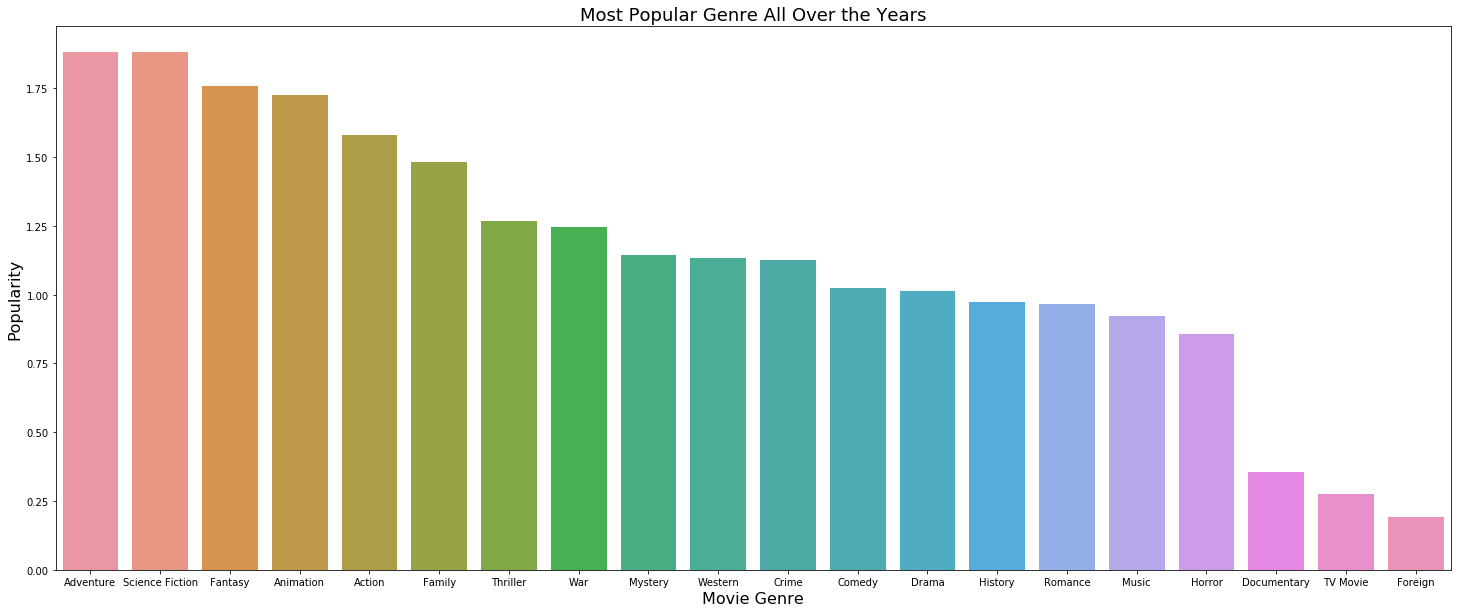

In [172]:
plt.figure(figsize=(25,10))
sns.barplot(x='genres',  y="popularity", data=df_popular_all_years, order=df_popular_all_years.sort_values('popularity',ascending = False).genres)
plt.title('Most Popular Genre All Over the Years', fontsize=18)
plt.xlabel('Movie Genre', fontsize=16)
plt.ylabel('Popularity', fontsize=16);

Reference to sort values 
- https://datavizpyr.com/sort-bars-in-barplot-using-seaborn-in-python/
- https://datavizpyr.com/how-to-adjust-positions-of-axis-labels-in-matplotlib/

Result: The most popular genre is adventure

### Research Question 2  (The most popular movie genre per year)

In [173]:
list_years = list(df_genres_splitted.release_year.unique())


To group by each year and calculate the mean a for loop will be used to loop throughout tha data frame

In [174]:
list_genres = []
list_popularity = []
for year in list_years:
    year_no = df_genres_splitted.loc[df_genres_splitted.release_year == year]
    data = year_no.groupby(["genres"])["popularity"].mean()
    df_popularity_year =  pd.DataFrame(data)
    list_genres.append(df_popularity_year.popularity.idxmax())
    list_popularity.append(df_popularity_year.popularity.max())
df_popularity_year_append = pd.DataFrame({'release_year': list_years,
                                          'genres': list_genres,
                                          'popularity': list_popularity})
  

In [175]:
df_popularity_year_append.head()

,release_year,genres,popularity
0,1995,Animation,3.097868
1,1977,Action,2.709534
2,2003,Fantasy,2.909258
3,1994,Crime,2.017196
4,1999,Fantasy,1.372226


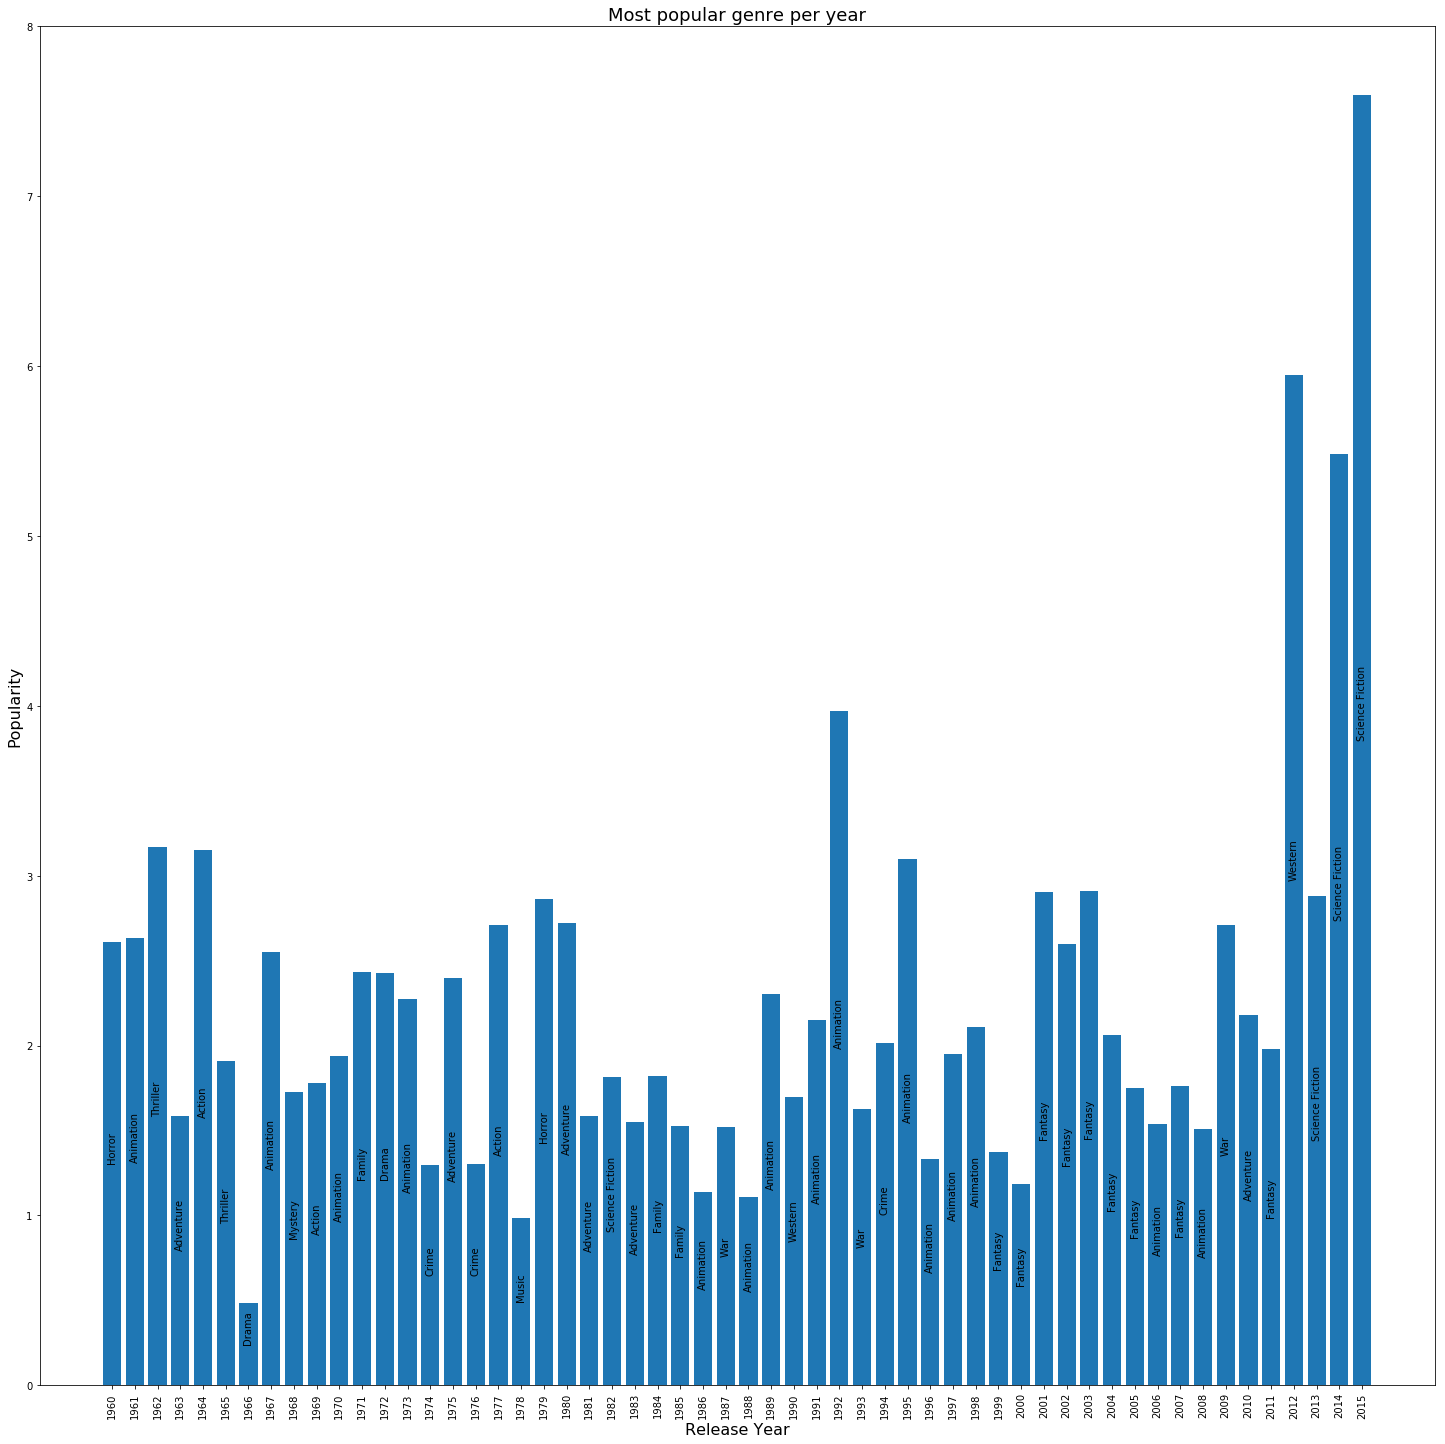

In [176]:
fig, ax = plt.subplots(figsize = (25, 25))
bar_x = df_popularity_year_append.release_year
bar_height = df_popularity_year_append.popularity
bar_tick_label = df_popularity_year_append.release_year
bar_label = df_popularity_year_append.genres
plt.xticks(rotation=90)
bar_plot = plt.bar(bar_x, bar_height, tick_label = bar_tick_label, width=0.8)

def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=90)

autolabel(bar_plot)

plt.ylim(0,8)
plt.title('Most popular genre per year', fontsize=18)
plt.xlabel('Release Year', fontsize=16)
plt.ylabel('Popularity', fontsize=16);

Reference to add text on bars
- https://moonbooks.org/Articles/How-to-add-text-on-a-bar-with-matplotlib-/
- https://stackoverflow.com/questions/63521320/how-to-add-text-values-in-bar-plot-seaborn-python
- https://stackoverflow.com/questions/1221108/barchart-with-vertical-labels-in-python-matplotlib

The most popular genre in 2015 is science fiction

### Research Question 3  (Changes in average votes and average popularity through the years)

In [177]:
df_ave = df_clean.groupby(["release_year"], as_index = False)["vote_average", "popularity", "revenue", "profit", "budget", "revenue_adj", "profit_adj", "budget_adj" ].mean()
df_ave.head()

,release_year,vote_average,popularity,revenue,profit,budget,revenue_adj,profit_adj,budget_adj
0,1960,7.400000,1.324513,2.580100e+07,2.163961e+07,4.161390e+06,1.902299e+08,1.595481e+08,3.068179e+07
1,1961,6.620000,0.787718,3.377202e+07,2.990832e+07,3.863700e+06,2.463622e+08,2.181770e+08,2.818516e+07
2,1962,6.900000,0.983485,2.947569e+07,2.383998e+07,5.635714e+06,2.124740e+08,1.718493e+08,4.062476e+07
3,1963,6.766667,1.040612,2.942115e+07,1.923531e+07,1.018583e+07,2.094838e+08,1.369589e+08,7.252496e+07
4,1964,6.971429,1.377790,4.694479e+07,4.209691e+07,4.847880e+06,3.300344e+08,2.959526e+08,3.408189e+07


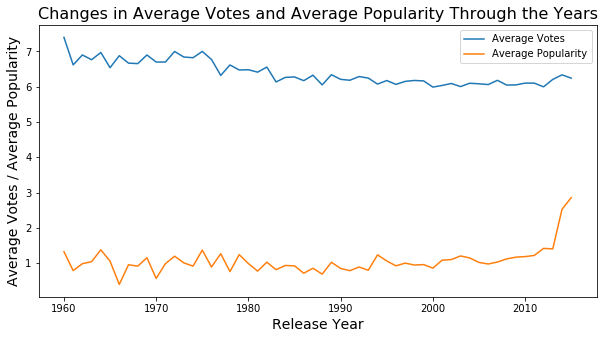

In [178]:
plt.subplots(figsize = (10, 5))
vote = df_ave.vote_average
year = df_ave.release_year
plt.plot(year,vote,label = "Average Votes")
popularity = df_ave.popularity
year = df_ave.release_year
plt.plot(year,popularity, label = "Average Popularity")
plt.legend()
plt.title('Changes in Average Votes and Average Popularity Through the Years', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Average Votes / Average Popularity', fontsize=14);

Result: The average votes decrease by the time and popularity increase by time steadilly after 1980

### Research Question 4  (Changes in average revenue through the years and display the inflation effect)

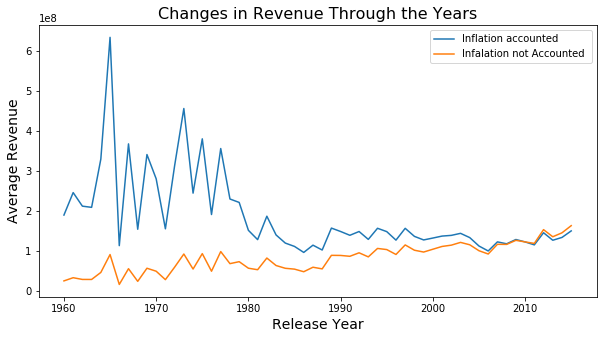

In [179]:
plt.subplots(figsize = (10, 5))
year = df_ave.release_year
revenue_adj = df_ave.revenue_adj
plt.plot(year,revenue_adj, label = "Inflation accounted")
year = df_ave.release_year
revenue = df_ave.revenue
plt.plot(year,revenue, label = "Infalation not Accounted ")
plt.legend()

plt.title('Changes in Revenue Through the Years', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Average Revenue', fontsize=14);

Result: The change in revenue without counting the inflation increases with time. In terms of the inflation it decreases after 1980

### Research Question 5 (Changes in average profit through the years and display the inflation effect)

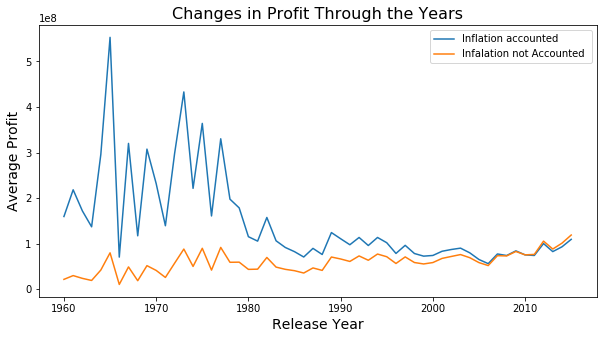

In [180]:
plt.subplots(figsize = (10, 5))
year = df_ave.release_year
profit_adj = df_ave.profit_adj
plt.plot(year,profit_adj, label = "Inflation accounted")
year = df_ave.release_year
profit = df_ave.profit
plt.plot(year,profit, label = "Infalation not Accounted ")
plt.legend()

plt.title('Changes in Profit Through the Years', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Average Profit', fontsize=14);

Result: The change in profit without counting the inflation increases with time. In terms of the inflation it decreases after 1980

### Research Question 6  (Effect of budget production on the revenue)

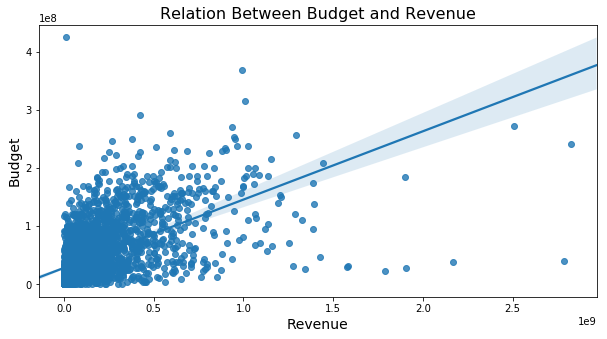

In [181]:
plt.subplots(figsize = (10, 5))
sns.regplot(x=df_clean.revenue_adj,y=df_clean.budget_adj)
plt.title('Relation Between Budget and Revenue', fontsize=16)
plt.xlabel('Revenue', fontsize=14)
plt.ylabel('Budget', fontsize=14);

Result: The revenue increases by paying more mony on the production of the movie

### Research Question 7  (Effect of Popularity and Votes on Revenue)

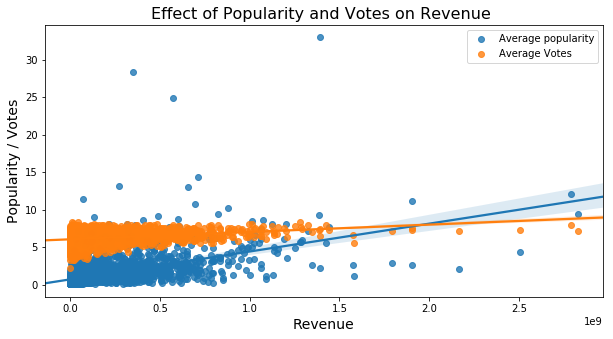

In [182]:
plt.subplots(figsize = (10, 5))
sns.regplot(x=df_clean.revenue_adj,y=df_clean.popularity,label = "Average popularity")
sns.regplot(x=df_clean.revenue_adj,y=df_clean.vote_average,label = "Average Votes")
plt.legend()
plt.title('Effect of Popularity and Votes on Revenue ', fontsize=16)
plt.xlabel('Revenue', fontsize=14)
plt.ylabel('Popularity / Votes', fontsize=14);

Result: The popularity increases over time and the ratings decrease

### Research Question 8  (Relation between revenue and profit)

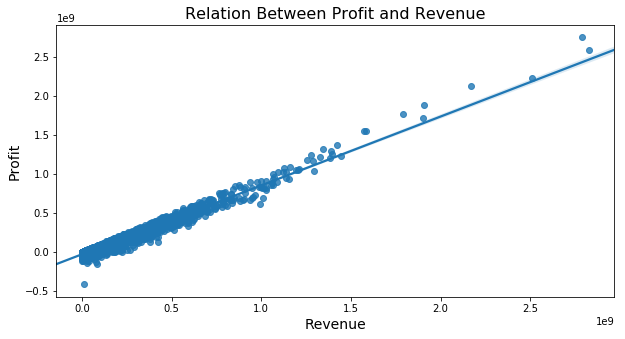

In [183]:
plt.subplots(figsize = (10, 5))
sns.regplot(x=df_clean.revenue_adj,y=df_clean.profit_adj)
plt.title('Relation Between Profit and Revenue', fontsize=16)
plt.xlabel('Revenue', fontsize=14)
plt.ylabel('Profit', fontsize=14);

Reference to add trendline in a scatter plot using seaborn library
- https://seaborn.pydata.org/generated/seaborn.regplot.html

Result: There is a positive relation between profit and revenue

### Research Question 9  (Count of movies against runtime)

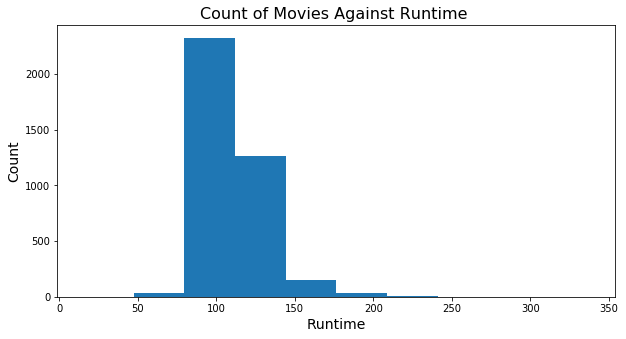

In [184]:
df_clean.runtime.plot(kind = "hist", figsize = (10, 5));
plt.title('Count of Movies Against Runtime ', fontsize=16)
plt.xlabel('Runtime', fontsize=14)
plt.ylabel('Count', fontsize=14);

In [185]:
df_clean.runtime.describe()

count    3805.000000
mean      109.351117
std        19.845678
min        15.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

Result: The runtime of about 50% of the movies is 106 min and the mean is 109 min

### Research Question 10  (The most popular movie over the years)

In [186]:
df_clean.popularity.max()

32.985762999999999

In [187]:
df_clean.loc[df_clean.popularity == 32.985762999999999]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
id,,,,,,,,,,,,,,,,
135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09,1.254446e+09


Result: The most popular movie over he years is Jurassic World

### Research Question 11  (The movie got the highest revenue over the years)

In [188]:
df_clean.revenue_adj.max()

2827123750.41189

In [189]:
df_clean.loc[df_clean.revenue_adj == 2827123750.41189]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
id,,,,,,,,,,,,,,,,
19995,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,7.1,2009,2.408869e+08,2.827124e+09,2.544506e+09,2.586237e+09


In [190]:
df_clean.loc[df_clean.revenue == df_clean.revenue.max()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
id,,,,,,,,,,,,,,,,
19995,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,7.1,2009,2.408869e+08,2.827124e+09,2.544506e+09,2.586237e+09


Result: The movie got highest revenue is Avatar

<a id='conclusions'></a>
## Conclusions

TMDb movie data was analyzed to answer some interested questions. The analysis has shown the following answers:

- The most popular movie type over the years was found to be the adventure type
- The most popular movie per each year was displayed 
- The change in the average popularity seemed to increase per year from 1980 up till 2015
- The average votes was decreasing through the years
- The revenue in terms of the inflation in currency was the highest in 1965 and then was varying over the next 15 years. After the 1980 the revenue was low up till 2015. But without accounting the inflation the revenue was changing in an increasing way over the years
- The change in profit with and without the inflation consideration was almost the same as the renenue
- There is a positive relation between the production budget and the revenue 
- The revenue is affected positively by the popularity and negatively by the ratings or votes
- There is a positive relation between the revenue and the profit which eplains why the change in revenue and the change in profit over the years are almost summetric
- The runtime of 50% of the movies is 106 min and the average runtime is 109 min
- The most popular movie over the years is Jurassic World
- The movie got the highest revenue over the years is Avatar

### Limitations

- The given analysis was done only based on the given data set
- There was alot of missing values that I had to drop. If it were existed, the analysis whould changed
- The analysis was done using the revenue and budget in terms of inflation
- There was no information about the currency given so the analysis was done based on the numeric values given
- It whould be better if we know the parameters that the popularity was based on 
- It whould be better if we know how the inflation was counted 

<a id='refrences'></a>
## List of References
> Reference for how to raplace values with NaN 
- https://datatofish.com/replace-nan-values-with-zeros/

> Reference to correct the wrong year format from 2066 to 1966 
- https://codereview.stackexchange.com/questions/223035/parse-date-format-in-pandas-using-python

> Reference for how to split column values into multiple rows 
- https://programmer.ink/think/pandas-how-do-i-split-text-in-a-column-into-multiple-lines-python.html

> Reference to sort values 
- https://datavizpyr.com/sort-bars-in-barplot-using-seaborn-in-python/
- https://datavizpyr.com/how-to-adjust-positions-of-axis-labels-in-matplotlib/

> Reference to add text on bars
- https://moonbooks.org/Articles/How-to-add-text-on-a-bar-with-matplotlib-/
- https://stackoverflow.com/questions/63521320/how-to-add-text-values-in-bar-plot-seaborn-python
- https://stackoverflow.com/questions/1221108/barchart-with-vertical-labels-in-python-matplotlib

> Reference to add trendline in a scatter plot using seaborn library
- https://seaborn.pydata.org/generated/seaborn.regplot.html

In [191]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0